Importing libraries

In [342]:
#Library for html requests
import requests

#Library for web scraping
import bs4 

# Library for converting scraped data in a dataframe 
import pandas as pd

#Library for visualizing insights from scraped data 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

#to build plots using matplotlib in jupyter notebooks 
%matplotlib inline

Setting up the urls.

Scraping data regarding the genres, top 50 songs and new songs

In [303]:
url_1 = "http://soundcloud.com/charts"
url_2 = "https://soundcloud.com/charts/top"
url_3 = "https://soundcloud.com/charts/new"

# Part- 1

Using the request library for requests and beaustiful soup library for parsing the html requests 

In [41]:
request_1 = requests.get(url_1)
soup_1 = bs4.BeautifulSoup(request_1.text)

In [375]:
#print(request_.text)

Scrutinizing for the data needed using the surrounding tags in the html and listing out the result

In [71]:
genres = soup_1.select('a[href*=genre]')[4:]


for index, genre in  enumerate(genres):
    print(str(index) + ':' + genre.text)

0:Alternative Rock
1:Ambient
2:Classical
3:Country
4:Dance & EDM
5:Dancehall
6:Deep House
7:Disco
8:Drum & Bass
9:Dubstep
10:Electronic
11:Folk & Singer-Songwriter
12:Hip-hop & Rap
13:House
14:Indie
15:Jazz & Blues
16:Latin
17:Metal
18:Piano
19:Pop
20:R&B & Soul
21:Reggae
22:Reggaeton
23:Rock
24:Soundtrack
25:Techno
26:Trance
27:Trap
28:Triphop
29:World
30:Audiobooks
31:Business
32:Comedy
33:Entertainment
34:Learning
35:News & Politics
36:Religion & Spirituality
37:Science
38:Sports
39:Storytelling
40:Technology


# Part-2

Requesting urls and parsing html using request and Beautiful Soup library

In [284]:
request_2 = requests.get(url_2)
soup_2 = bs4.BeautifulSoup(request_2.text)

In [374]:
#print(request_2.text)

Scrutinizing data using tags

In [286]:
albums = soup_2.select('a')

Slicing the list in order to remove unwanted data

In [377]:
albums = albums[47:-7]
#albums

Chcking the format of data 

In [288]:
line_1 = albums[0]
line_1

<a href="/liltecca/lil-tecca-ransom-1" itemprop="url">Ransom</a>

Getting the required part of the data

In [289]:
line_1.contents[0]

'Ransom'

Getting the required data from the entire list in form of a list named top_songs

In [350]:
top_songs = []
for album in albums:
    songs = album.contents[0]
    top_songs.append(songs)

Visualizing the list

In [378]:
#top_songs

The list contains songs and name of the artists as alternate entries. Thus, slicing the list into two lists

1. Songs
2. Artist

In [352]:
songs = top_songs[::2]
artists = top_songs[1::2]

Putting the lists into a pandas dataframe

In [380]:
top_50 = pd.DataFrame({'Song':songs,'Artist':artists})
#top_50

Unique artists in the list using the nunique method

In [354]:
print("Different artists : {}".format(top_50['Artist'].nunique()))

Different artists : 36


Artists with more than one song in the top 50 list

In [362]:
top_artists = top_50['Artist'].value_counts().sort_values(ascending = False).head(12)
top_artists

POLO G                    4
Ynw Melly                 3
NLE Choppa                3
BTS                       2
Lil Baby                  2
Lil Tjay                  2
Lil Nas X                 2
A BOOGIE WIT DA HOODIE    2
Lil Tecca â°             2
LIL UZI VERT              2
Quando Rondo              1
Ambjaay                   1
Name: Artist, dtype: int64

Artists with more than two songs in top 50

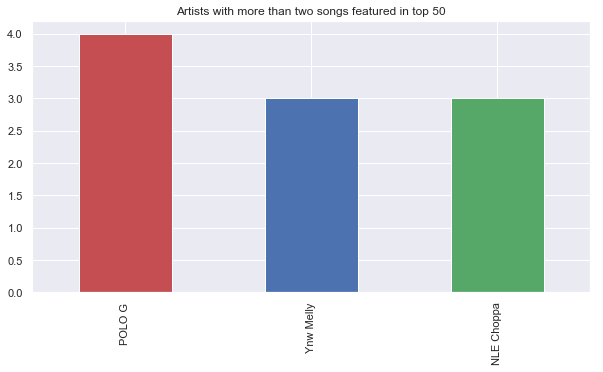

In [373]:
top_artists.head(3).plot(kind = 'bar', 
                         color = ['r','b','g'],
                         figsize = (10,5),
                        title = 'Artists with more than two songs featured in top 50')

# Part - 3

In [304]:
request_3 = requests.get(url_3)
soup_3 = bs4.BeautifulSoup(request_3.text)

In [381]:
#print(request_3.text)

Scrutinizing the data using tags 

In [382]:
new = soup_3.select('a')[47:-7]
#new

Putting the scrutinized results into a list named new_songs

In [318]:
new_songs = []
for song in new:
    songs = song.contents[0]
    new_songs.append(songs)

In [383]:
#new_songs

Slicing the lists for new songs since it also contains both name of artists and songs

In [320]:
songs = new_songs[::2] 
artists = new_songs[1::2]

Putting the lists formed in form of a dataframe

In [384]:
new = pd.DataFrame({'Song':songs,'Artist':artists})
#new

Unique number of artists in the list

In [367]:
print("Different artists in the list : {}".format(new['Artist'].nunique()))

Different artists in the list : 45


Artists with more than one song in the list

In [370]:
new['Artist'].value_counts().sort_values(ascending = False).head()

Lil Keed           4
octobersveryown    2
Drake              2
Luh Kel            1
mohamed arfat      1
Name: Artist, dtype: int64

Plotting the results for artists with more than one song in the list

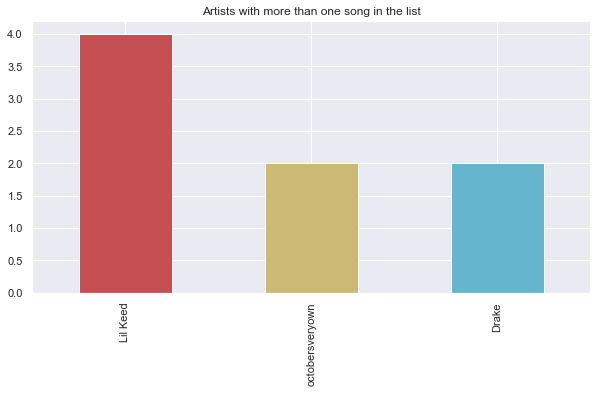

In [371]:
new['Artist'].value_counts().sort_values(ascending = False).head(3).plot(kind = 'bar',
                                                                        color = ['r','y','c'],
                                                                       title = 'Artists with more than one song in the list',
                                                                       figsize = (10,5))